In [40]:
import numpy as np
import pandas as pd

In [41]:
data = np.loadtxt(open("Lab4Data.csv", "rb"), delimiter=";", skiprows=1)

In [42]:
x=data[:,:-1]
y=data[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)

In [55]:
def distNeighbours(X_train,Y_train,X_test,K):
    distance=[]
    for i in range(len(X_train)):
        eDistance=0
        for j in range(X_train.shape[1]):
            #eDistance+=round(abs(X_train[i,j]-X_test[j]))
            eDistance+=round(np.sqrt(pow((X_train[i,j]-X_test[j]),2)),2)
        distance.append((eDistance,i,Y_train[i]))
        distance=sorted(distance, key=lambda x: x[0])[0:K]
    return distance

def predictOutputCategorical(X_train,Y_train,X_test,K):
    neighbours=[]
    responses=[]
    for i in range(len(X_test)):
        neighbours.append(distNeighbours(X_train,Y_train,X_test[i,:],K))
    for i in neighbours:
        votes={}
        for j in i:
            if j[-1] in votes.keys():
                votes[j[-1]]=votes[j[-1]]+1
            else:
                votes[j[-1]]=1
        responses.append(sorted(votes,key=votes.get,reverse=True)[0])
    return responses

In [56]:
def predictOutputNumeric(X_train,Y_train,X_test,K):
    neighbours=[]
    responses=[]
    for i in range(len(X_test)):
        neighbours.append(distNeighbours(X_train,Y_train,X_test[i,:],K))
    for i in neighbours:
        mean=0
        for j in i:
            mean+=j[-1]
        mean=mean/K
        responses.append(mean)
    return responses


In [57]:
from sklearn import metrics

In [59]:
#Predict species
output=predictOutputCategorical(X_train,Y_train,X_test,7)
#getAccuracyCategorical(Y_test,output)

In [63]:
scores={}
score_list=[]
k_range=range(1,10)

for k in k_range:
    y_pred_knn=predictOutputCategorical(X_train,Y_train,X_test,k)
    
    scores[k]=metrics.accuracy_score(Y_test,y_pred_knn)
    score_list.append(metrics.accuracy_score(Y_test,y_pred_knn))

Text(0, 0.5, 'testing accuracy')

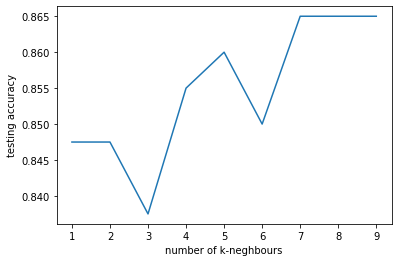

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range,score_list)
plt.xlabel("number of k-neghbours")
plt.ylabel("testing accuracy")

In [46]:
#for Manhatten distance
scores1={}
score_list1=[]
k_range=range(1,10)

for k in k_range:
    y_pred_knn1=predictOutputCategorical(X_train,Y_train,X_test,k)
    
    scores1[k]=metrics.accuracy_score(Y_test,y_pred_knn1)
    score_list1.append(metrics.accuracy_score(Y_test,y_pred_knn1))

Text(0, 0.5, 'testing accuracy')

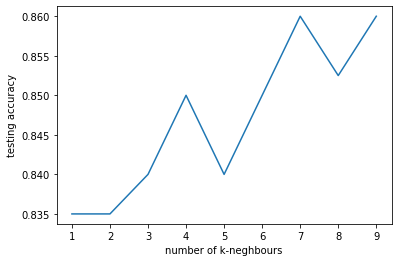

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range,score_list1)
plt.xlabel("number of k-neghbours")
plt.ylabel("testing accuracy")

In [48]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [61]:
cm1=confusion_matrix(Y_test,output)

In [62]:
print(cm1)
print("******************************************")
print("accuracy of knn-classification is",accuracy_score(output,Y_test)*100)

[[110  10   1]
 [ 16 105  11]
 [  0  16 131]]
******************************************
accuracy of knn-classification is 86.5


In [52]:
 y_pred_knn2=predictOutputCategorical(X_train,Y_train,X_test,7)

In [53]:
cm=confusion_matrix(Y_test,y_pred_knn2)

In [54]:
print(cm)
print("******************************************")
print("accuracy of knn-classification is",accuracy_score(y_pred_knn1,Y_test)*100)

[[107  13   1]
 [ 15 106  11]
 [  0  16 131]]
******************************************
accuracy of knn-classification is 86.0


In [11]:
print(accuracy_score(Y_test,output))

0.8125


In [12]:
output1=predictOutputNumeric(X_train,Y_train,X_test,3)

In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
error=mean_squared_error(Y_test,output1)

In [15]:
error

0.14027777777777778

In [67]:
#for Manhatten distance
scores2={}
score_list2=[]
k_range=range(1,10)

for k in k_range:
    y_pred_knn_1=predictOutputCategorical(X_train,Y_train,X_test,k)
    
    scores2[k]=metrics.mean_squared_error(Y_test,y_pred_knn-1)
    score_list2.append(metrics.mean_squared_error(Y_test,y_pred_knn_1))

TypeError: unsupported operand type(s) for -: 'list' and 'int'

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range,score_list2)
plt.xlabel("number of k-neghbours regression")
plt.ylabel("testing accuracy")